In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding= 'latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.duplicated().sum()

403

In [6]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [7]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5169 non-null   object
 1   v2          5169 non-null   object
 2   Unnamed: 2  43 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  5 non-null      object
dtypes: object(5)
memory usage: 242.3+ KB


In [10]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'target','v2':'message'}, inplace = True)
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
p1 = df['target'].value_counts()
p1

ham     4516
spam     653
Name: target, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label = LabelEncoder()
df['target'] = label.fit_transform(df['target'])

In [15]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.shape

(5169, 2)

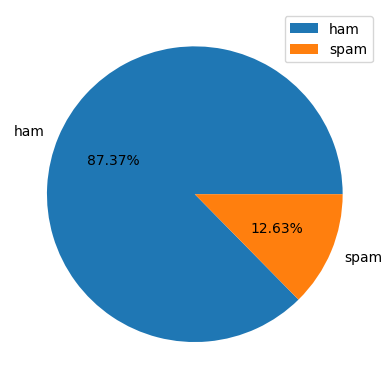

In [17]:
plt.pie(p1.values, labels = p1.index, autopct='%0.2f%%')
plt.legend()
plt.show()

In [18]:
import nltk

In [19]:
df['num_charact'] = df['message'].apply(len)
df.head(3)

,target,message,num_charact
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [20]:
df['num_words'] = df['message'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head(3)

,target,message,num_charact,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [21]:
df['num_sentences'] = df['message'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head(3)

,target,message,num_charact,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [22]:
df.describe()

,target,num_charact,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
ham = df[df['target'] == 0]
ham.describe()

,target,num_charact,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [24]:
spam = df[df['target'] == 1]
spam.describe()

,target,num_charact,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


##### By the mean value can be conclude that spam messages are having high number of characters, high number of words and high number of senteces than ham messages

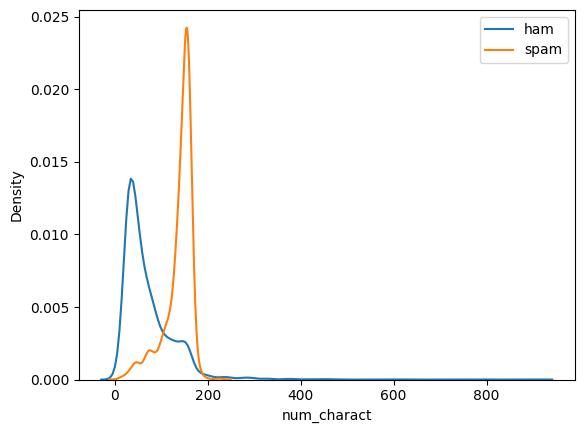

In [25]:
sns.kdeplot(ham['num_charact'])
sns.kdeplot(spam['num_charact'])
plt.legend(['ham','spam'])
plt.show()

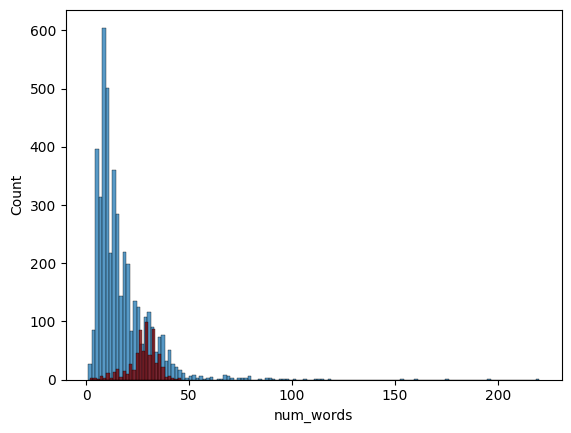

In [26]:
sns.histplot(ham['num_words'])
sns.histplot(spam['num_words'], color='maroon')
plt.show()

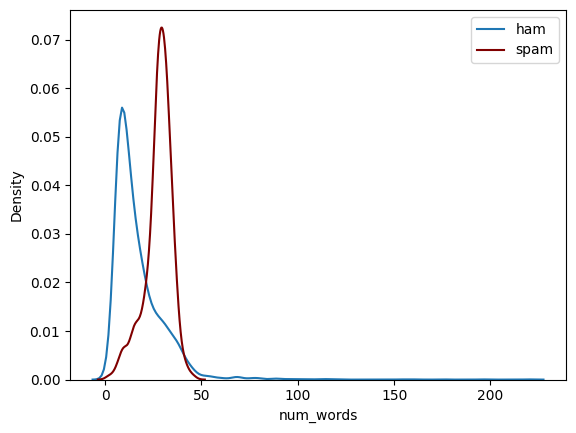

In [27]:
sns.kdeplot(ham['num_words'])
sns.kdeplot(spam['num_words'], color='maroon')
plt.legend(['ham','spam'])
plt.show()

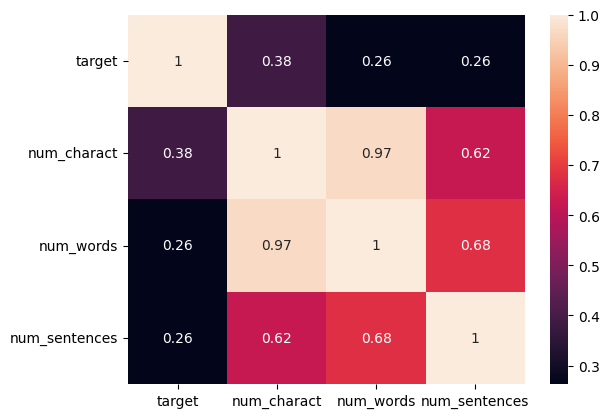

In [28]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

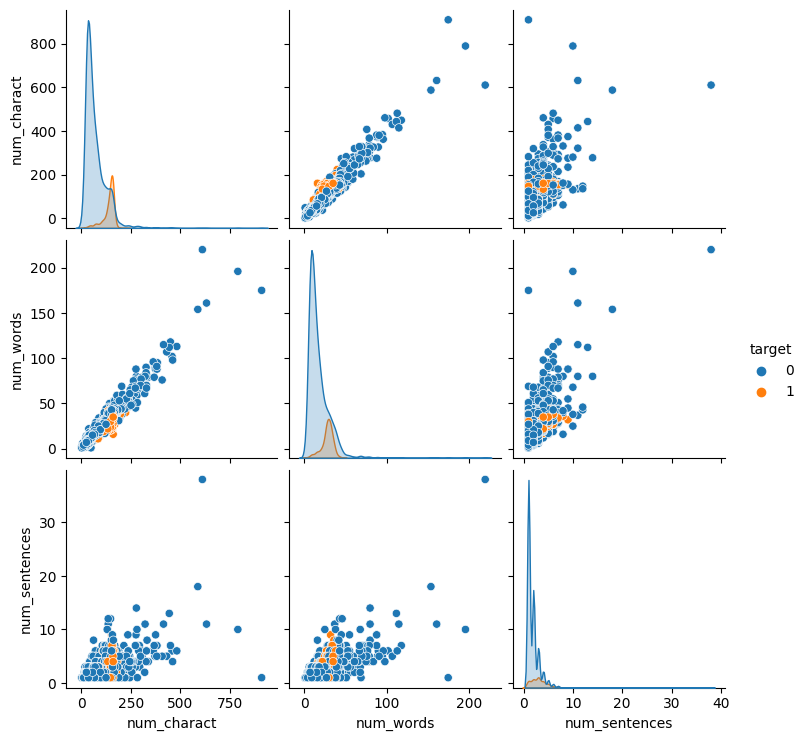

In [29]:
sns.pairplot(data = df, hue = 'target')
plt.show()

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
p = PorterStemmer()

In [33]:
def trans_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #lowercase
    x = []
    for i in text: #removing special characters
        if i.isalnum():            #aphanumeric
            x.append(i)
    y = []
    for i in x: #remove punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    z = []
    for i in y: #removing sentences like ing
        a = p.stem(i) 
        z.append(a)
    return ' '.join(z)

In [34]:
df['message'][1]

'Ok lar... Joking wif u oni...'

In [35]:
trans_text(df['message'][1]) # calling the trans_text fuction

'ok lar joke wif u oni'

In [36]:
df['trans_text'] = df['message'].apply(trans_text)
df.head()

,target,message,num_charact,num_words,num_sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64

In [38]:
from collections import Counter

In [39]:
r1 = df[df['target'] == 0]['trans_text'].tolist() #ham
r1

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [40]:
r2 = df[df['target'] == 1]['trans_text'].tolist() #spam
r2

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [41]:
count1 = [] #ham
for i in r1:
    for j in i.split():
        count1.append(j)

In [42]:
count2 = [] #spam
for n in r2:
    for m in n.split():
        count2.append(m)

In [43]:
ham = pd.DataFrame(Counter(count1).most_common(20))
ham.rename(columns={0:'ham_word',1:'ham_count'}, inplace= True)
ham

,ham_word,ham_count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


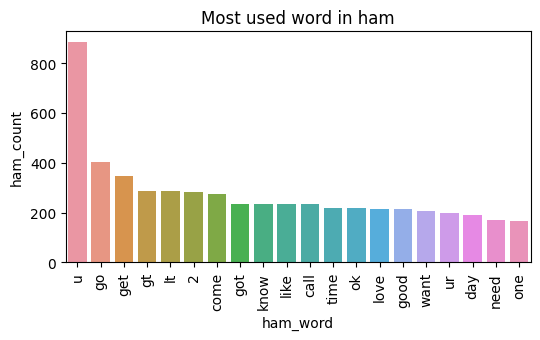

In [44]:
plt.figure(figsize = (6,3))
plt.title('Most used word in ham')
sns.barplot(data = ham, x = 'ham_word', y = 'ham_count')
plt.xticks(rotation = 90)
plt.show()

In [45]:
spam = pd.DataFrame(Counter(count2).most_common(20))
spam.rename(columns={0:'spam_word',1:'spam_count'}, inplace= True)
spam

,spam_word,spam_count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


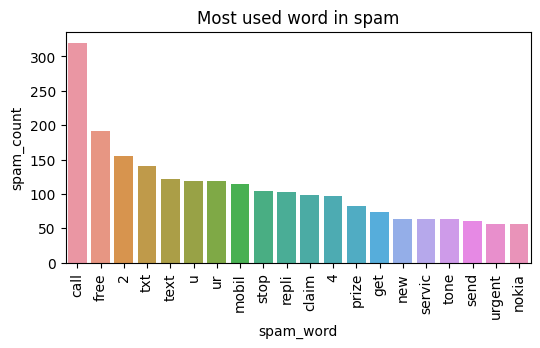

In [46]:
plt.figure(figsize = (6,3))
sns.barplot(data = spam, x = 'spam_word', y = 'spam_count')
plt.title('Most used word in spam')
plt.xticks(rotation = 90)
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [48]:
cv = CountVectorizer()
tv = TfidfVectorizer()

In [49]:
tv_x = tv.fit_transform(df['trans_text']).toarray()

In [50]:
df['trans_text'].shape

(5169,)

In [51]:
y = df['target']
y.shape

(5169,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(tv_x, y, test_size =0.23, random_state = 40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3980, 6708)
(1189, 6708)
(3980,)
(1189,)


In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report

In [55]:
def report(ytest, ypred):
    print('Confusion Metrix\n', confusion_matrix(ytest, ypred))
    print('Classifiction Report\n', classification_report(ytest, ypred))
    print('Accuracy Score\n', accuracy_score(ytest, ypred))
    print('R2 Scor\n', r2_score(ytest, ypred))

In [56]:
gn = GaussianNB()
mn = MultinomialNB()
bn = BernoulliNB(alpha=0.001)

# 1) GaussianNB

In [57]:
gn.fit(x_train, y_train)
gn_ypred = gn.predict(x_test)
report(y_test,gn_ypred)

Confusion Metrix
 [[922 132]
 [ 14 121]]
Classifiction Report
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1054
           1       0.48      0.90      0.62       135

    accuracy                           0.88      1189
   macro avg       0.73      0.89      0.78      1189
weighted avg       0.93      0.88      0.89      1189

Accuracy Score
 0.8772077375946173
R2 Scor
 -0.22000140558015335


# 2) MultinomialNB

In [58]:
mn.fit(x_train, y_train)
mn_ypred = mn.predict(x_test)
report(y_test,mn_ypred)

Confusion Metrix
 [[1054    0]
 [  37   98]]
Classifiction Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1054
           1       1.00      0.73      0.84       135

    accuracy                           0.97      1189
   macro avg       0.98      0.86      0.91      1189
weighted avg       0.97      0.97      0.97      1189

Accuracy Score
 0.9688814129520605
R2 Scor
 0.6908215615995502


# 3) BernoulliNB

In [59]:
bn.fit(x_train, y_train)
bn_ypred = bn.predict(x_test)
report(y_test,bn_ypred)

Confusion Metrix
 [[1051    3]
 [   5  130]]
Classifiction Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1054
           1       0.98      0.96      0.97       135

    accuracy                           0.99      1189
   macro avg       0.99      0.98      0.98      1189
weighted avg       0.99      0.99      0.99      1189

Accuracy Score
 0.9932716568544996
R2 Scor
 0.9331506079134162


In [60]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [61]:
dt = DecisionTreeClassifier(random_state = 40)
ex = ExtraTreeClassifier(random_state = 40)
rf = RandomForestClassifier(n_estimators = 80, random_state=40)
ab = AdaBoostClassifier(n_estimators =80, base_estimator = dt)
xg = XGBClassifier(n_estimators = 80, gamma = 2)

# 4) DecisionTreeClassifier

In [62]:
dt.fit(x_train, y_train)
dt_ypred = dt.predict(x_test)
report(y_test,dt_ypred)

Confusion Metrix
 [[1032   22]
 [  21  114]]
Classifiction Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1054
           1       0.84      0.84      0.84       135

    accuracy                           0.96      1189
   macro avg       0.91      0.91      0.91      1189
weighted avg       0.96      0.96      0.96      1189

Accuracy Score
 0.9638351555929352
R2 Scor
 0.6406845175346123


# 5) ExtraTreeClassifier

In [63]:
ex.fit(x_train, y_train)
ex_ypred = ex.predict(x_test)
report(y_test,ex_ypred)

Confusion Metrix
 [[1036   18]
 [  25  110]]
Classifiction Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1054
           1       0.86      0.81      0.84       135

    accuracy                           0.96      1189
   macro avg       0.92      0.90      0.91      1189
weighted avg       0.96      0.96      0.96      1189

Accuracy Score
 0.9638351555929352
R2 Scor
 0.6406845175346123


# 6) RandomForestClassifier

In [64]:
rf.fit(x_train, y_train)
rf_ypred = rf.predict(x_test)
report(y_test,rf_ypred)

Confusion Metrix
 [[1053    1]
 [  27  108]]
Classifiction Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1054
           1       0.99      0.80      0.89       135

    accuracy                           0.98      1189
   macro avg       0.98      0.90      0.94      1189
weighted avg       0.98      0.98      0.98      1189

Accuracy Score
 0.9764507989907485
R2 Scor
 0.7660271276969569


# 7) AdaBoostClassifier

In [65]:
ab.fit(x_train, y_train)
ab_ypred = ab.predict(x_test)
report(y_test,ab_ypred)

Confusion Metrix
 [[1033   21]
 [  22  113]]
Classifiction Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1054
           1       0.84      0.84      0.84       135

    accuracy                           0.96      1189
   macro avg       0.91      0.91      0.91      1189
weighted avg       0.96      0.96      0.96      1189

Accuracy Score
 0.9638351555929352
R2 Scor
 0.6406845175346123


# 8) XGBClassifier

In [66]:
xg.fit(x_train, y_train)
xg_ypred = xg.predict(x_test)
report(y_test,xg_ypred)

Confusion Metrix
 [[1049    5]
 [  22  113]]
Classifiction Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1054
           1       0.96      0.84      0.89       135

    accuracy                           0.98      1189
   macro avg       0.97      0.92      0.94      1189
weighted avg       0.98      0.98      0.98      1189

Accuracy Score
 0.977291841883936
R2 Scor
 0.7743833017077799


### from the above can be concluded that BornoulliNB is the best model in term of "accuracy" as "r2 socre"

In [67]:
import pickle

In [73]:
pickle.dump(bn, open('BornoulliNB.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(tv, open('vectorizer', 'wb'))

In [68]:
pickle.dump(trans_text,open('transform','wb'))